# Correlations

One correlation for bubble history of direct contact condensation of vapor bubbles in a subcooled liquid such considers a stagnant bubble in liquid dominated by heat transfer, which can be represented as

```{math}
\beta = 1 - 4Ja\sqrt\frac{Fo_0}{\pi}
```

where {math}`\beta` is the dimensionless bubble diameter {math}`D/D_0` with {math}`D_0` being the initial bubble diameter, {math}`Ja` is the Jakob number {math}`\rho_l c_{pl}\Delta T_{sub}/\rho_v h_{fg}` , and {math}`Fo_0` is the Fourier number {math}`\alpha t/D_{b0}^2` .{footcite}`tangReviewDirectContact2022`{footcite}`florschuetzMechanicsVaporBubble1965`


In [ ]:
from patch import patch

patch()

import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from myst_nb import glue

from boilercv.correlations import (
    dimensionless_bubble_diameter_florschuetz_chao_1965,
    dimensionless_bubble_diameter_inaba,
    dimensionless_bubble_diameter_yuan,
    fourier,
    jakob,
    kinematic_viscosity,
    prandtl,
    reynolds,
)
from boilercv.format import set_format
from boilercv.models.params import PARAMS

set_format()
_ = display()
# This warning fires unnecessarily when Seaborn or Pandas plots are placed in existing
# axes. This warning can't be caught in context of `warnings.catch_warnings()` because
# it fires *after* a cell finishes executing. So we have to disable this globally.
warnings.filterwarnings(
    category=UserWarning,
    action="ignore",
    message="This figure includes Axes that are not compatible with",
)
sns.set_theme(
    context="notebook",
    style="whitegrid",
    palette="bright",
    font="sans-serif",
)
plt.style.use(style=PARAMS.project_paths.mpl_base)

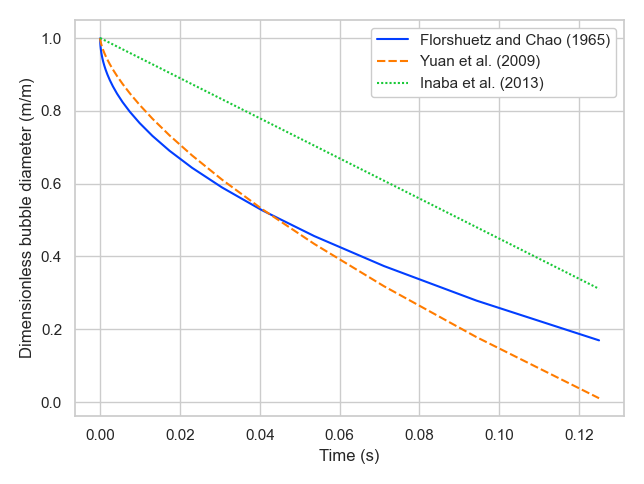

In [ ]:
from boilercv.correlations import thermal_diffusivity

time = np.logspace(-6, 0) / 8  # s
bubble_initial_diameter = 1e-3  # m
bubble_initial_velocity = 0.7e-2  # m/s
subcooling = 2  # K

latent_heat_of_vaporization = 2.23e6  # J/kg
liquid_density = 960  # kg/m^3
liquid_dynamic_viscosity = 2.88e-4  # Pa-s
liquid_isobaric_specific_heat = 4213  # J/kg-K
liquid_thermal_conductivity = 0.676  # W/m-K
vapor_density = 0.804  # kg/m^3

liquid_kinematic_viscosity = kinematic_viscosity(
    density=liquid_density, dynamic_viscosity=liquid_dynamic_viscosity
)
liquid_thermal_diffusivity = thermal_diffusivity(
    thermal_conductivity=liquid_thermal_conductivity,
    density=liquid_density,
    isobaric_specific_heat=liquid_isobaric_specific_heat,
)

bubble_initial_reynolds = reynolds(
    velocity=bubble_initial_velocity,
    characteristic_length=bubble_initial_diameter,
    kinematic_viscosity=liquid_kinematic_viscosity,
)
liquid_prandtl = prandtl(
    dynamic_viscosity=liquid_dynamic_viscosity,
    isobaric_specific_heat=liquid_isobaric_specific_heat,
    thermal_conductivity=liquid_thermal_conductivity,
)
bubble_jakob = jakob(
    liquid_density=liquid_density,
    vapor_density=vapor_density,
    liquid_isobaric_specific_heat=liquid_isobaric_specific_heat,
    subcooling=subcooling,
    latent_heat_of_vaporization=latent_heat_of_vaporization,
)
bubble_fourier = fourier(
    liquid_thermal_diffusivity=liquid_thermal_diffusivity,
    initial_bubble_diameter=bubble_initial_diameter,
    time=time,
)

fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Dimensionless bubble diameter (m/m)")
sns.lineplot(
    ax=ax,
    data=(
        pd.DataFrame(index=time).assign(
            **{
                "Florshuetz and Chao (1965)": dimensionless_bubble_diameter_florschuetz_chao_1965(
                    jakob=bubble_jakob, fourier=bubble_fourier
                ),
                "Yuan et al. (2009)": dimensionless_bubble_diameter_yuan(
                    bubble_initial_reynolds=bubble_initial_reynolds,
                    liquid_prandtl=liquid_prandtl,
                    bubble_jakob=bubble_jakob,
                    bubble_fourier=bubble_fourier,
                ),
                "Inaba et al. (2013)": dimensionless_bubble_diameter_inaba(
                    bubble_initial_reynolds=bubble_initial_reynolds,
                    liquid_prandtl=liquid_prandtl,
                    bubble_jakob=bubble_jakob,
                    bubble_fourier=bubble_fourier,
                ),
            }
        )
    ),
)
glue("dimensionless-bubble-diameter", fig, display=False)

```{glue:figure} dimensionless-bubble-diameter
Dimensionless bubble diameter
```


array([[<Axes: title={'center': 'ypx'}>, <Axes: title={'center': 'xpx'}>]],
      dtype=object)

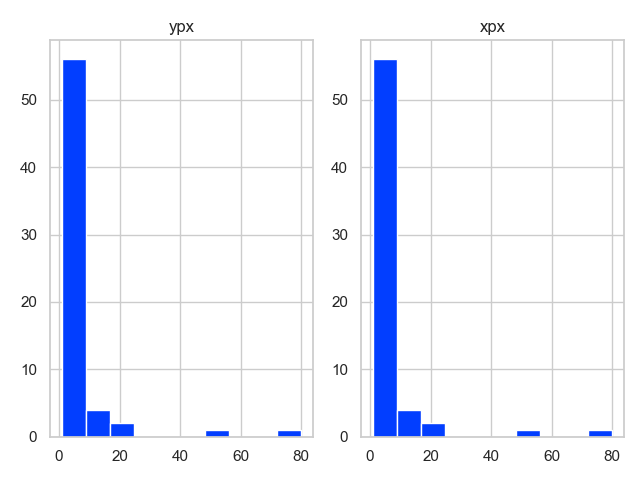

In [ ]:
"""Select the subset of data corresponding to unobstructed bubbles."""

from boilercv.data.sets import get_contours_df, get_dataset

EXAMPLE_UNOBSRUCTED_VIDEO = "2021-01-14T13-46-01"

ds = get_dataset(EXAMPLE_UNOBSRUCTED_VIDEO, stage="filled")
contours = get_contours_df(EXAMPLE_UNOBSRUCTED_VIDEO)
contours.loc[pd.IndexSlice[0, :], :].groupby(level="contour").count().hist()

In [ ]:
contours.loc[pd.IndexSlice[0, :], :].groupby(level="contour").transform("count")

ypx  xpx
frame contour          
0     0          2    2
      0          2    2
      1          1    1
      2          1    1
      3          1    1
      4          1    1
      5          1    1
      6          3    3
      6          3    3
      6          3    3
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
      7         23   23
...            ...  ...
      59         1    1
      60         8    8
      60         8    8
      60         8    8
      60         8    8
      60         8    8
      60         8    8
      60         8    8
      60         8    8
      61         2    2
      61         2    2
      62         1    1
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13
      63        13   13

[308 rows x 2 columns]

## References

```{footbibliography}

```
